<a href="https://colab.research.google.com/github/random-words/colab-notebooks/blob/main/01__neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Start

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.17.1'

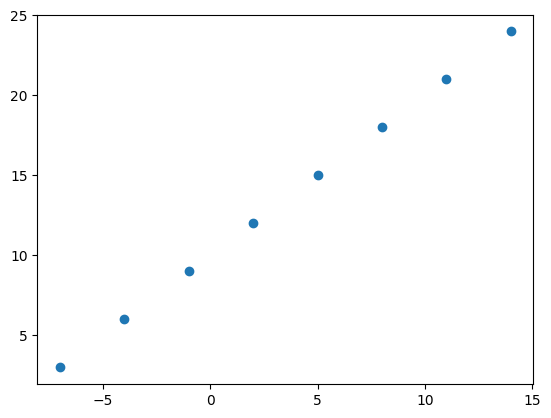

In [2]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize data
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# Create a demo tensor
house_features = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_features, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X.shape, y.shape

((8,), (8,))

In [6]:
X[0].shape, y[0].shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

## Steps in modeling tensorflow model

1. Creating a model - defining input, output and hidden layers
2. Compiling - defining loss function and evaluation metrics
3. Fitting model

In [10]:
# Set random seed
tf.random.set_seed(42)

# Creating a model with Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# or can create like that:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# Compiling model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - loss: 11.7523 - mae: 11.7523
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.6198 - mae: 11.6198
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.4873 - mae: 11.4873
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.3548 - mae: 11.3548
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.2222 - mae: 11.2222
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.0898 - mae: 11.0898
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.9573 - mae: 10.9573
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.8248 - mae: 10.8248
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.6923 - mae: 10.6923
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.5598 - mae: 10.5598


In [11]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try to make a prediction
y_pred = model.predict(tf.constant([17]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[14.539072]], dtype=float32)

### Improving model

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# Rebuilding model and tuning it
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
#   tf.keras.layers.Dense(100, activation="relu"),
#   tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.2492 - mae: 13.2492
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.3744 - mae: 12.3744
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.4966 - mae: 11.4966
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.6354 - mae: 10.6354
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.7877 - mae: 9.7877
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.9276 - mae: 8.9276
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.2727 - mae: 8.2727
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.6037 - mae: 7.6037
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.9095 - mae: 6.9095
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.1900 - mae: 6.1900
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.4439 - mae: 5.4439
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.6705 - mae: 4.6705
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27

In [14]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try to make a prediction
y_pred = model.predict(tf.constant([17]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[27.005297]], dtype=float32)

### Evaluating model

In [132]:
# Create bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [133]:
# Make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

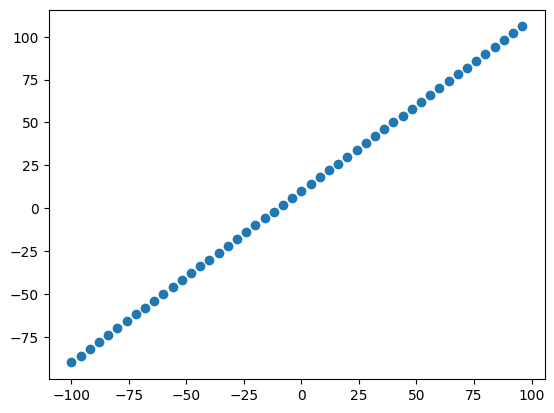

In [18]:
# Visualize data
plt.scatter(X, y)

# Data is splitted into 3 sets:

* **Training set** - model fitting on that
* **Validation set** - tuning model on that
* **Test set** - final evaluation set


In [134]:
(X_train, y_train), (X_test, y_test) = (X[:40], y[:40]), (X[40:], y[40:])
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing splitted data

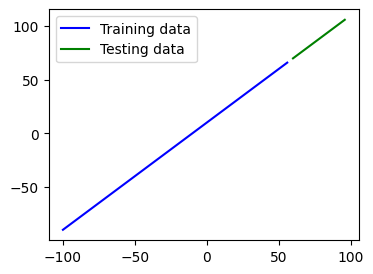

In [20]:
plt.figure(figsize=(4, 3))
# Plot training data in blue
plt.plot(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.plot(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(tf.expand_dims(X_train, axis=-1), y, epochs=100)

### Visualizing model

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
import tensorflow as tf

# Creating a model, that builds automatically using input_shape
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
#    tf.keras.layers.Dense(100, name="hidden_layer_1"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="test_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=["mae"]
)

In [24]:
model.summary()

Model: "test_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Total params** - total number of parameters in the model.

**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

**Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [68]:
# Fit the model
# every time we fitting a model, epochs stack up: 100 -> 200 -> 300 -> ...
model.fit(tf.expand_dims(X_train, -1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 74.8575 - mae: 74.8575
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71.4069 - mae: 71.4069 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.9981 - mae: 67.9981 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 64.6266 - mae: 64.6266 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 61.2926 - mae: 61.2926
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 57.9962 - mae: 57.9962 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 54.7370 - mae: 54.7370
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 51.5288 - mae: 51.5288 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48.3778 - mae: 48.3778 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.2620 - mae: 45.2620 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.1793 - mae: 42.1793 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.1269 - mae: 39.1269 
Epoch 13/100
2/2 ━━━━━━━━━

In [26]:
model.summary()

Model: "test_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

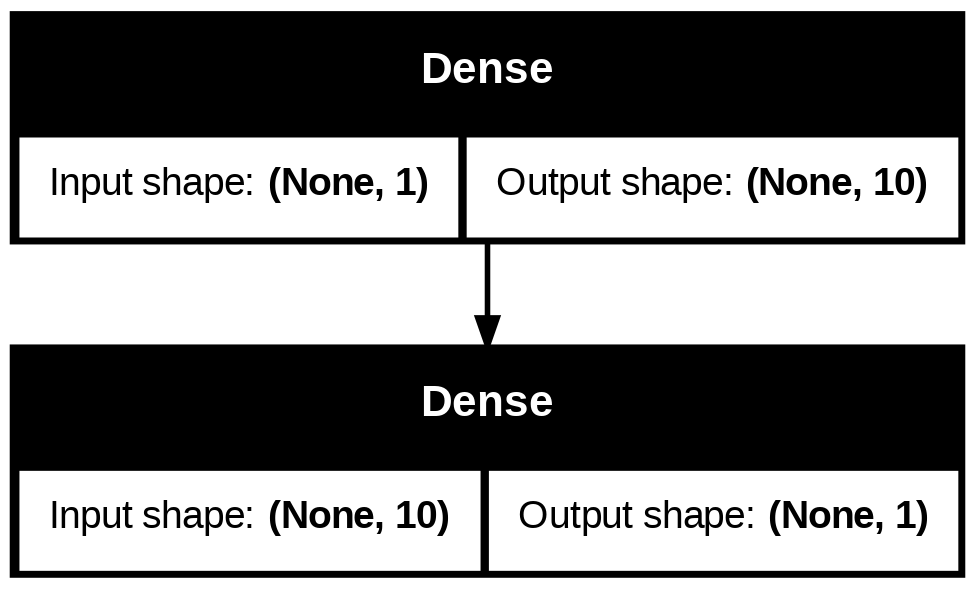

In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing model's predictions

In [69]:
# Make predictions
y_preds = model.predict(y_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[ 68.531204],
       [ 72.23648 ],
       [ 75.94175 ],
       [ 79.647026],
       [ 83.352295],
       [ 87.05756 ],
       [ 90.76283 ],
       [ 94.4681  ],
       [ 98.17338 ],
       [101.87864 ]], dtype=float32)

In [71]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [72]:
import matplotlib.pyplot as plt

In [135]:
def plot_predictions(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, predictions=y_preds):
  plt.figure(figsize=(4, 3))
  # Plot training data in blue
  plt.plot(X_train, y_train, c='b', label='Training data')
  # Plot test data in green
  plt.plot(X_test, y_test, c='g', label='Testing data')
  # Plot predictions
  plt.plot(X_test, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

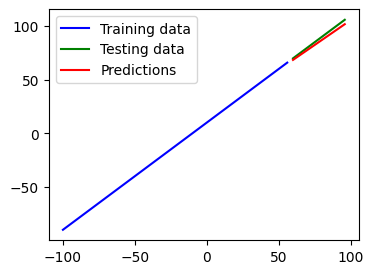

In [74]:
plot_predictions()

### Evaluating model's predictions with evaluation metrics

**2 common metrics:**
* MAE - mean absolute error
* MSE - mean squared error

(where's RMSE?..)

In [33]:
# Evaluate model on the test data
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 44.4664 - mae: 44.4664


[44.46641159057617, 44.46641159057617]

In [34]:
# Calculate Mean Absolute Error
tf.keras.metrics.MAE(y_test, y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([30.771236, 32.61882 , 34.46641 , 36.314003, 38.16159 , 40.009182,
       41.856773, 43.70436 , 45.551952, 47.399544], dtype=float32)>

In [35]:
# Calculate Mean Squared Error
tf.keras.metrics.MSE(y_test, y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 946.869 , 1063.9874, 1187.9335, 1318.7068, 1456.307 , 1600.7346,
       1751.9895, 1910.0712, 2074.9805, 2246.7168], dtype=float32)>

In [36]:
import numpy as np
np.sqrt(np.mean((y_preds - y_test) ** 2))

41.69172579781269

In [37]:
y_test - y_preds

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[31, 35, 39, 43, 47, 51, 55, 59, 63, 67],
       [29, 33, 37, 41, 45, 49, 53, 57, 61, 65],
       [27, 31, 35, 39, 43, 47, 51, 55, 59, 63],
       [25, 29, 33, 37, 41, 45, 49, 53, 57, 61],
       [23, 27, 31, 35, 39, 43, 47, 51, 55, 59],
       [21, 25, 29, 33, 37, 41, 45, 49, 53, 57],
       [18, 22, 26, 30, 34, 38, 42, 46, 50, 54],
       [16, 20, 24, 28, 32, 36, 40, 44, 48, 52],
       [14, 18, 22, 26, 30, 34, 38, 42, 46, 50],
       [12, 16, 20, 24, 28, 32, 36, 40, 44, 48]], dtype=int32)>

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
y_preds

array([[39.228764],
       [41.38118 ],
       [43.53359 ],
       [45.685997],
       [47.83841 ],
       [49.990818],
       [52.143227],
       [54.29564 ],
       [56.448048],
       [58.600456]], dtype=float32)

In [40]:
# Predictions have one more dimention...
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[39.228764],
       [41.38118 ],
       [43.53359 ],
       [45.685997],
       [47.83841 ],
       [49.990818],
       [52.143227],
       [54.29564 ],
       [56.448048],
       [58.600456]], dtype=float32)>

In [41]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([39.228764, 41.38118 , 43.53359 , 45.685997, 47.83841 , 49.990818,
       52.143227, 54.29564 , 56.448048, 58.600456], dtype=float32)>

In [75]:
# Calcucate MAE again
tf.keras.metrics.MAE(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=2.795073>

In [76]:
# Calculate MSE
tf.keras.metrics.MSE(y_true=y_test, y_pred=tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=8.529073>

In [77]:
# Huber error
tf.keras.losses.huber(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=2.295073>

In [78]:
def mae(y_test, y_pred):
  return tf.keras.metrics.MAE(y_test, tf.squeeze(y_pred))

def mse(y_test, y_pred):
  return tf.keras.metrics.MSE(y_test, tf.squeeze(y_pred))

### Running experiments to improving model

* Get more data
* Increase model's complexity (make larger model)
* Give it more time to train

```
3 modelling expreiments:
```
> `model_1` - 1 layer, 100 epochs

> `model_2` - 2 layers, 100 epochs

> `model_3` - 2 layers, 500 epochs

In [79]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [114]:
# Build model_1 (1 layer, 100 epochs)
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile it
model_1.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 70.5607 - mae: 70.5607
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.5740 - mae: 35.5740 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3992 - mae: 8.3992 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1258 - mae: 9.1258 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2137 - mae: 8.2137 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8649 - mae: 8.8649 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8197 - mae: 7.8197 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7767 - mae: 10.7767 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6260 - mae: 7.6260 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9485 - mae: 11.9485 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1317 - mae: 8.1317 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6755 - mae: 8.6755 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [118]:
X_test, print(X_test.shape)


(10,)


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 None)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


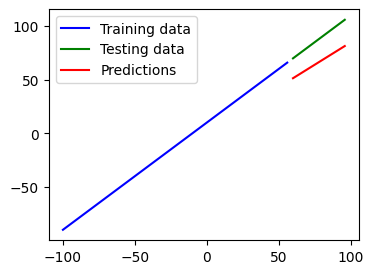

In [119]:
# make and plot predictions to model_1
y_preds_1 = model_1.predict(np.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_1)

In [95]:
y_preds_1

array([[54.001564],
       [57.50871 ],
       [61.015854],
       [64.523   ],
       [68.03015 ],
       [71.53729 ],
       [75.04444 ],
       [78.55159 ],
       [82.05873 ],
       [85.56588 ]], dtype=float32)

In [120]:
# Calculate eval metrics for model_1
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.533161>,
 <tf.Tensor: shape=(), dtype=float32, numpy=467.30118>)

In [141]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Build model_2 (2 layers, 100 epochs)
tf.random.set_seed(42)

# create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile it
model_2.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mse"])

# Fit the model_2
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 30.4190 - mse: 1269.8663 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25.7951 - mse: 905.5301 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.2281 - mse: 797.9302 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.9966 - mse: 334.5942
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.1779 - mse: 491.3358
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.6602 - mse: 278.1967 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.8630 - mse: 309.5204 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.6174 - mse: 331.2260 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6526 - mse: 213.6365 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6112 - mse: 297.5298 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.6443 - mse: 330.0904 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8774 - mse: 214.3088 
Epoch 13/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


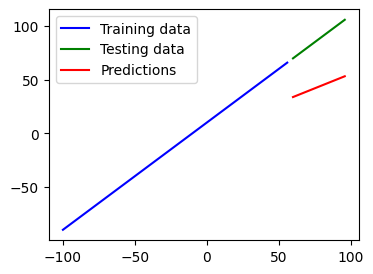

In [142]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [143]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=44.422382>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2001.4183>)

In [144]:
# Build model_3 (2 layers, 500 epochs)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mse"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - loss: 56.2817 - mse: 4646.0195
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.6908 - mse: 1046.7429 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.6695 - mse: 827.2673 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.9830 - mse: 539.7751 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.0278 - mse: 440.5977 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.2214 - mse: 400.7626 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.9004 - mse: 224.3241 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.7710 - mse: 305.6111 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.5929 - mse: 329.7989
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.6782 - mse: 213.2241
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6459 - mse: 298.2404 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.6945 - mse: 331.7984 
Epoch 13/50

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


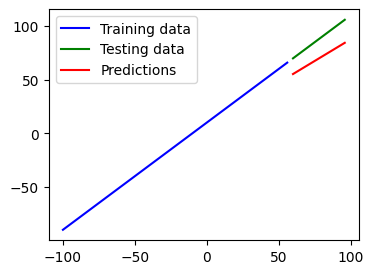

In [145]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [146]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=18.076038>,
 <tf.Tensor: shape=(), dtype=float32, numpy=331.52704>)

### Comparing the results of experiments

In [149]:
import pandas as pd

model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()],
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.533161,467.301178
1,model_2,44.422382,2001.418335
2,model_3,18.076038,331.527039


In [151]:
model_3.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Saving models

**2 main formats to save models:**
> The SavedModel format

> The HDF5 format

In [155]:
# Збереження моделі у форматі SavedModel
model_3.export("SavedModel_format_save")

Saved artifact at 'SavedModel_format_save'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_53')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136617880017552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136617880017360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136617880015056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136617880015248: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [156]:
# Saving model using HDF5 format
model_3.save("HDF5_format_save.h5")

### Loading in saved models

In [160]:
# Load SavedModel (cannot do that, because of newer version of Keras not allowing it)
loaded_SavedModel_model = tf.keras.models.load_model("/content/SavedModel_format_save")
loaded_SavedModel_model.summary()

ValueError: File format not supported: filepath=/content/SavedModel_format_save. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/content/SavedModel_format_save, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [163]:
# Load model using .h5 format
loaded_HDF5_model = tf.keras.models.load_model("/content/HDF5_format_save.h5")
loaded_HDF5_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [164]:
model_3.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [165]:
model_3_preds = model_3.predict(X_test)
model_HDF5_preds = loaded_HDF5_model.predict(X_test)

model_3_preds == model_HDF5_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model (or other files) in Google Colab

* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [167]:
from google.colab import files
# files.download("/content/HDF5_format_save.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Larger example

In [168]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [169]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [173]:
# One-hot encode dataframe with get_dummies
df_one_hot = pd.get_dummies(df)
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [174]:
X = df_one_hot.drop("charges", axis=1)

In [175]:
y = df_one_hot["charges"]

In [189]:
# Create train-test split with scikit learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [206]:
# Set random seed
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mse"])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10141.8418 - mse: 229943216.0000   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7595.4082 - mse: 159233648.0000 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7584.1143 - mse: 162060944.0000  
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7415.0112 - mse: 151913120.0000  
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7882.5938 - mse: 162361824.0000 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7639.2661 - mse: 160525376.0000 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7316.0850 - mse: 157857664.0000  
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7397.7334 - mse: 157689824.0000 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7332.8818 - mse: 150986592.0000  
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7513.4517 - mse: 151744304.0000  
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7324.5859 -

In [207]:
# Evaluate results
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6264.0796 - mse: 125209424.0000  


[6124.56640625, 123516904.0]

In [208]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [209]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [210]:
# Set random seed
tf.random.set_seed(42)

# Build another model with some tweaking
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mae,
              metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13223.5498 - mse: 316309632.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13039.8916 - mse: 311158720.0000 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12679.0742 - mse: 301273920.0000 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11990.0400 - mse: 283174688.0000 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10856.6299 - mse: 254801632.0000 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9424.1016 - mse: 218739232.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8114.9800 - mse: 183395616.0000 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7484.2490 - mse: 159283408.0000 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7389.2798 - mse: 151023008.0000 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7364.3657 - mse: 149853232.0000 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7343.1191 - mse:

In [211]:
model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4928.4004 - mse: 96258224.0000   


[4786.587890625, 95423528.0]

In [214]:
# Set random seed
tf.random.set_seed(42)

# Build another model with some tweaking
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mae,
              metrics=["mse"])

history = model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 13290.3184 - mse: 318206624.0000
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13139.3262 - mse: 313937344.0000
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12829.3535 - mse: 305371520.0000
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12194.1182 - mse: 288473440.0000
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11074.3486 - mse: 260221344.0000
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9588.1406 - mse: 222881664.0000
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8195.3359 - mse: 185589104.0000  
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7498.8950 - mse: 159577408.0000 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7396.2485 - mse: 150819536.0000 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7370.6333 - mse: 149801200.0000 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7347.9746 - mse: 14

In [215]:
model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3446.0535 - mse: 36657056.0000  


[3380.74267578125, 37390516.0]

Text(0.5, 0, 'Epochs')

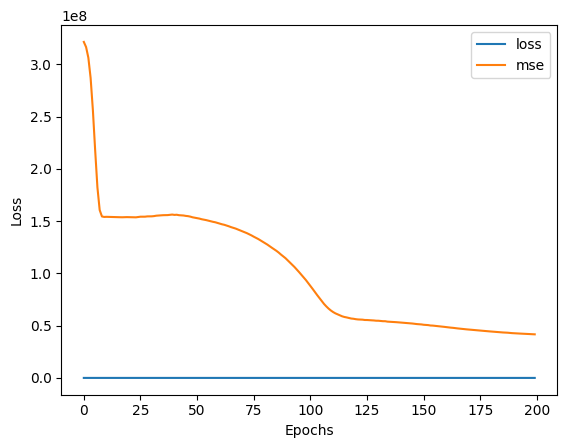

In [216]:
# plot history (a.k.a. loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

### Preprocessing data (normalization and standardization)

In [217]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


<Axes: ylabel='Frequency'>

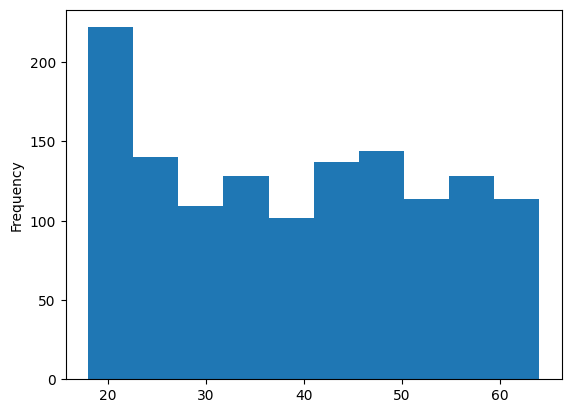

In [218]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

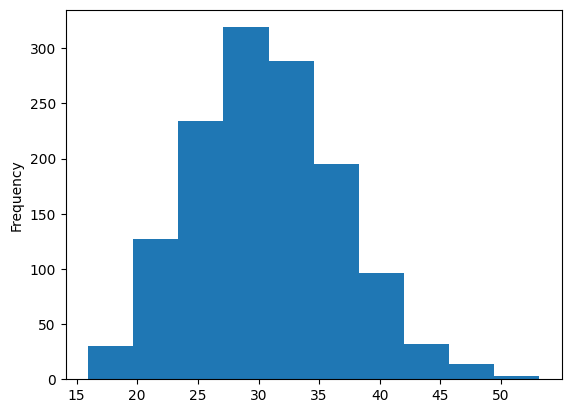

In [219]:
X["bmi"].plot(kind="hist")

In [222]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [225]:
# Take a few classes within scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [223]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in theese columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # create dummy variables from theese columns
)

In [224]:
# X & y
X = df.drop("charges", axis=1)
y = df["charges"]

In [226]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [227]:
# Fit column transformer to training data first
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [228]:
# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [229]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [231]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [234]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [241]:
# Create model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model.compile(tf.keras.optimizers.Adam(), "mae", metrics=["mse"])

history = model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13297.3086 - mse: 318395040.0000 
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13290.0059 - mse: 318198496.0000 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13271.6416 - mse: 317698240.0000 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13231.4365 - mse: 316604160.0000 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13158.2773 - mse: 314622720.0000 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13041.1865 - mse: 311475648.0000 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12869.7383 - mse: 306919648.0000 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12633.9111 - mse: 300751968.0000 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12323.9375 - mse: 292817824.0000 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11932.6406 - mse: 283038176.0000 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11467.052

In [242]:
model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3213.8340 - mse: 43093372.0000  


[3160.856689453125, 43232004.0]

<Axes: >

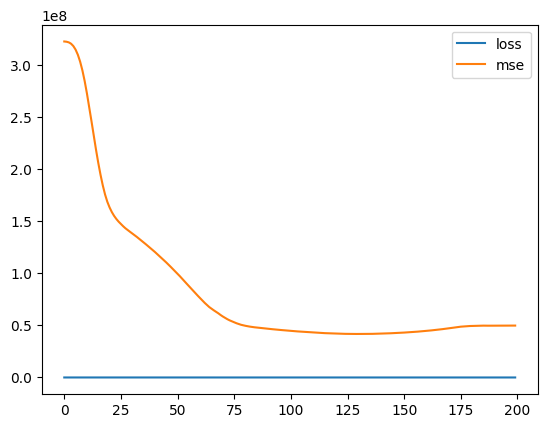

In [243]:
pd.DataFrame(history.history).plot()